## Combination Sampling With SMOTEENN

A downside of oversampling with SMOTE is its reliance on the immediate neighbors of a data point. Because the algorithm doesn’t see the overall distribution of data, the new data points it creates can be heavily influenced by outliers. This can lead to noisy data. With downsampling, the downsides are that it involves loss of data and is not an option when the dataset is small. One way to deal with these challenges is to use a sampling strategy that is a combination of oversampling and undersampling.

SMOTEENN combines the SMOTE and Edited Nearest Neighbors (ENN) algorithms. SMOTEENN is a two-step process:

1. Oversample the minority class with SMOTE.
2. Clean the resulting data with an undersampling strategy. If the two nearest neighbors of a data point belong to two different classes, that data point is dropped.

#### The series of images below help illustrate the SMOTEENN technique. The first image represents a synthetically generated dataset (using the make_blobs module) and shows two classes: purple as the majority class and yellow as the minority class.

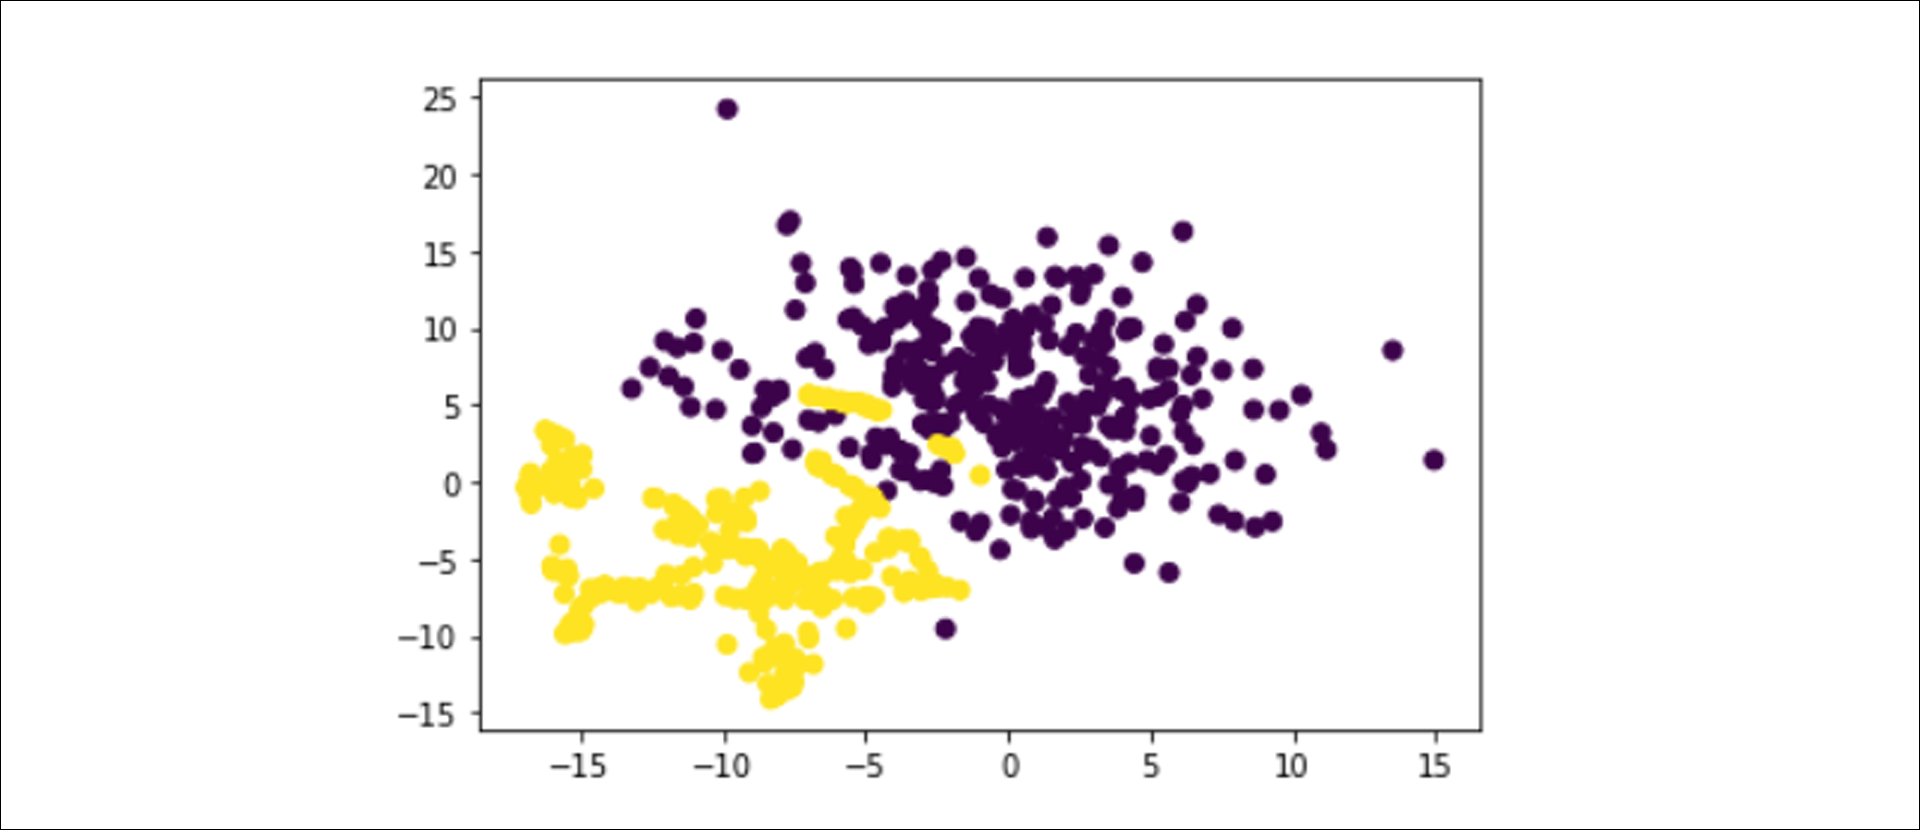

#### In the following image, the minority class is oversampled with SMOTE.

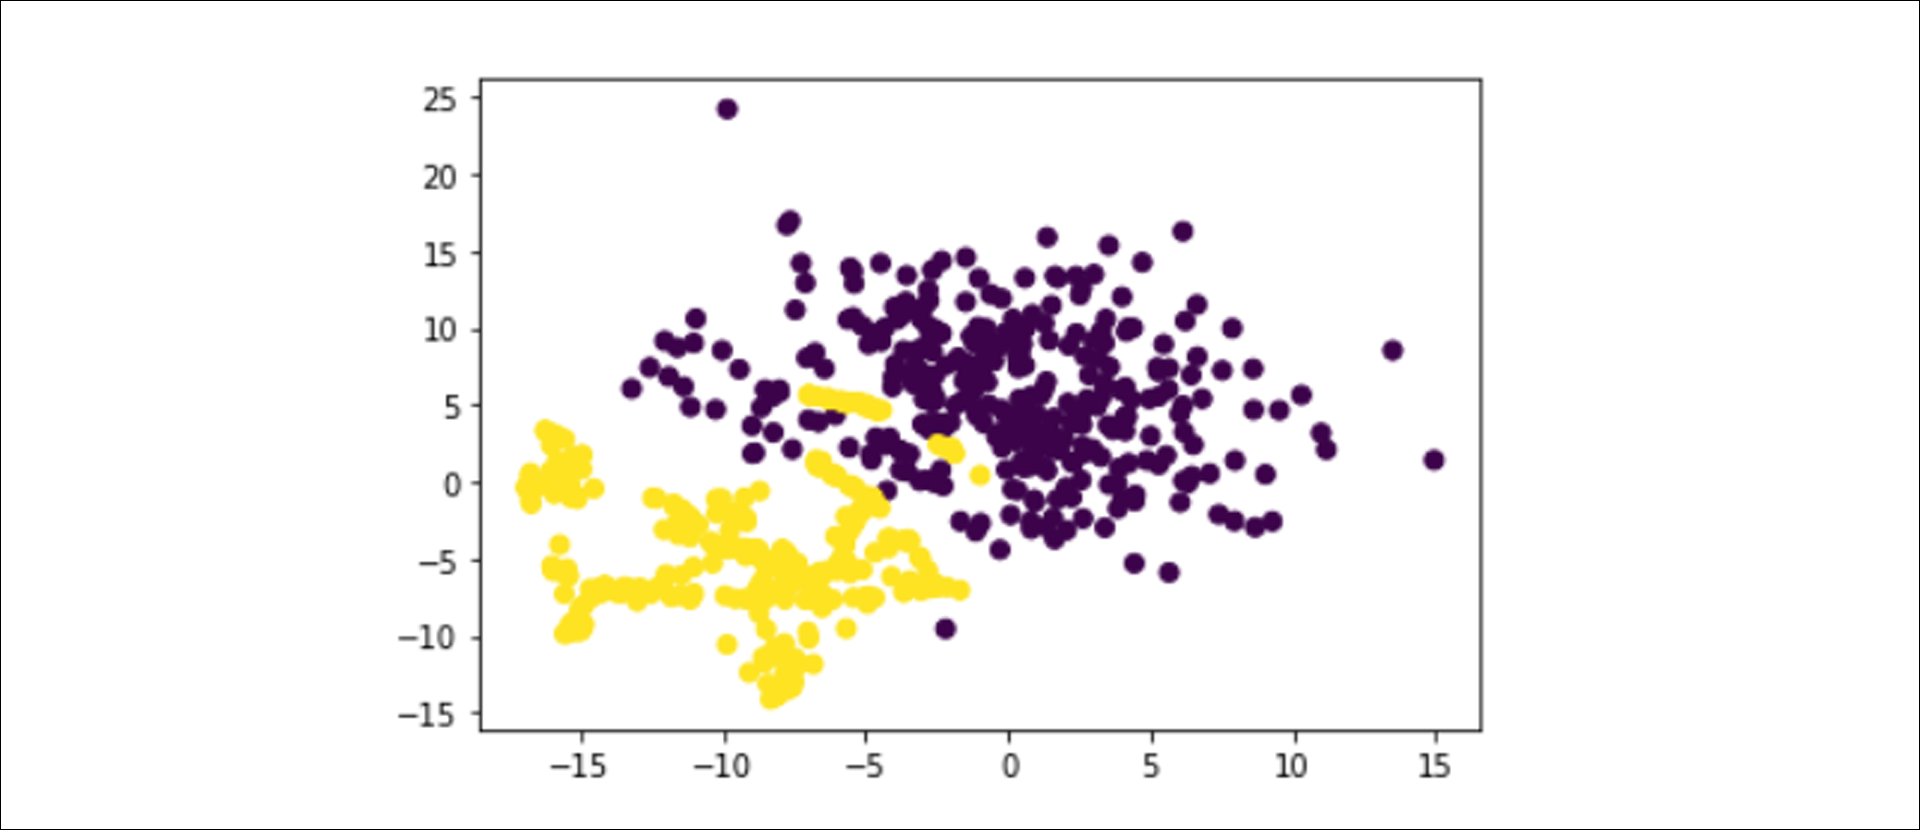

#### Note that the two classes significantly overlap, as the box indicates below. This overlap makes classification difficult.

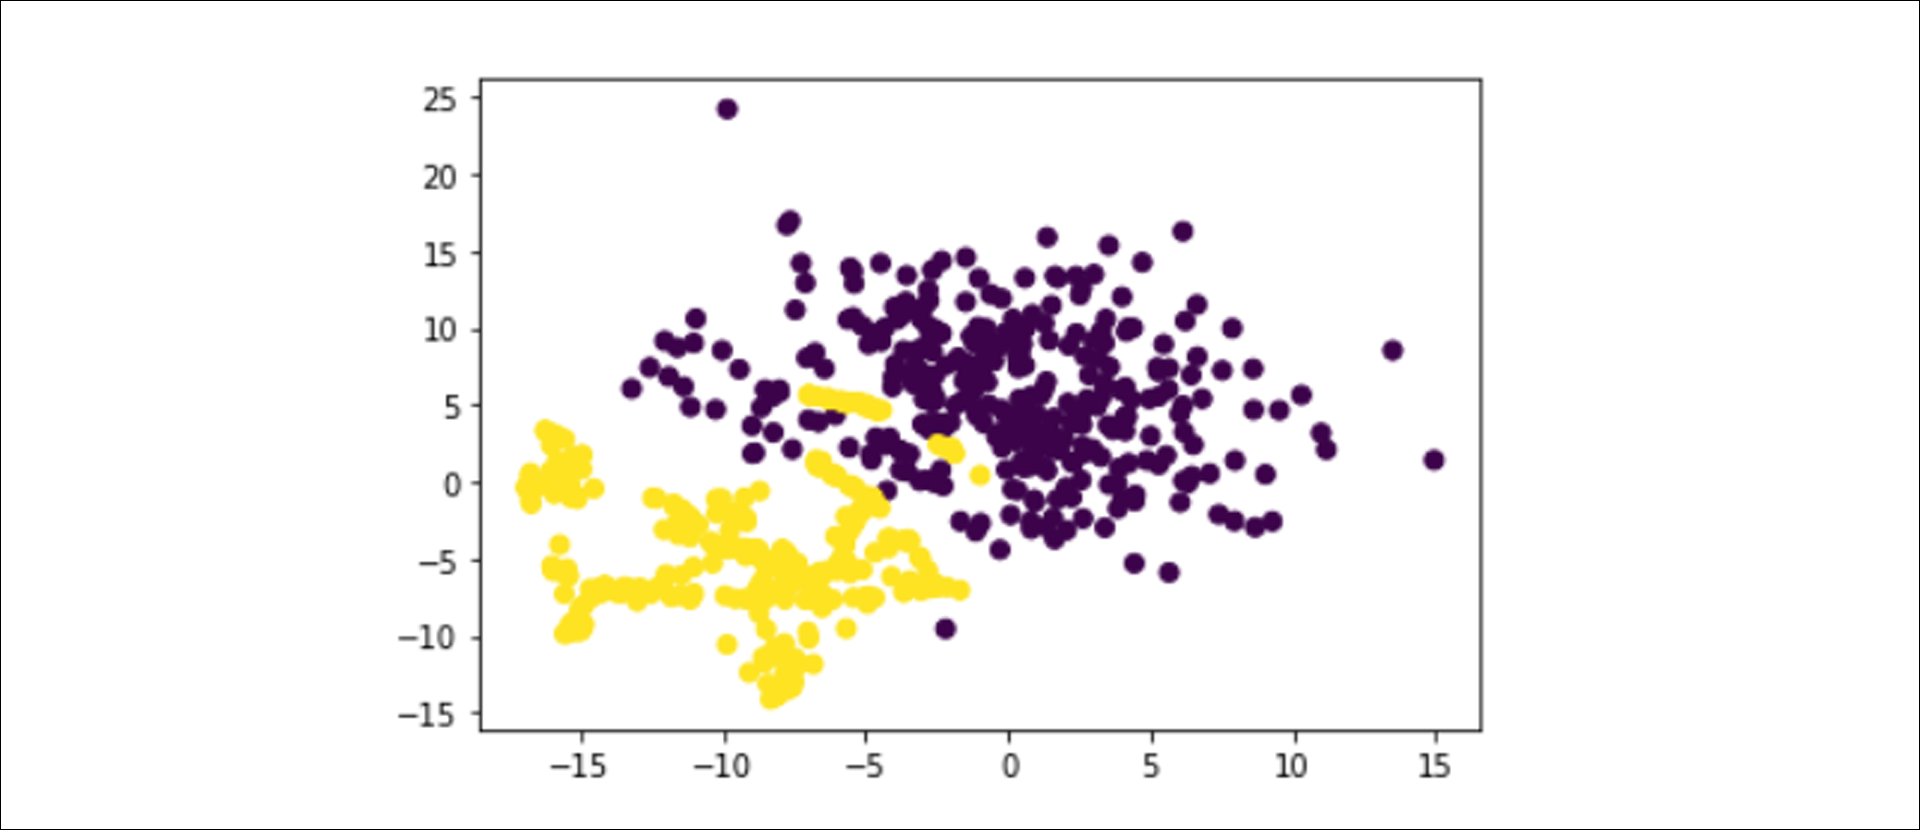

##### In the next image, SMOTEENN is applied, instead of SMOTE. As with SMOTE, the minority class is oversampled; however, an undersampling step is added, removing some of each class’s outliers from the dataset. The result is that the two classes are separated more cleanly.

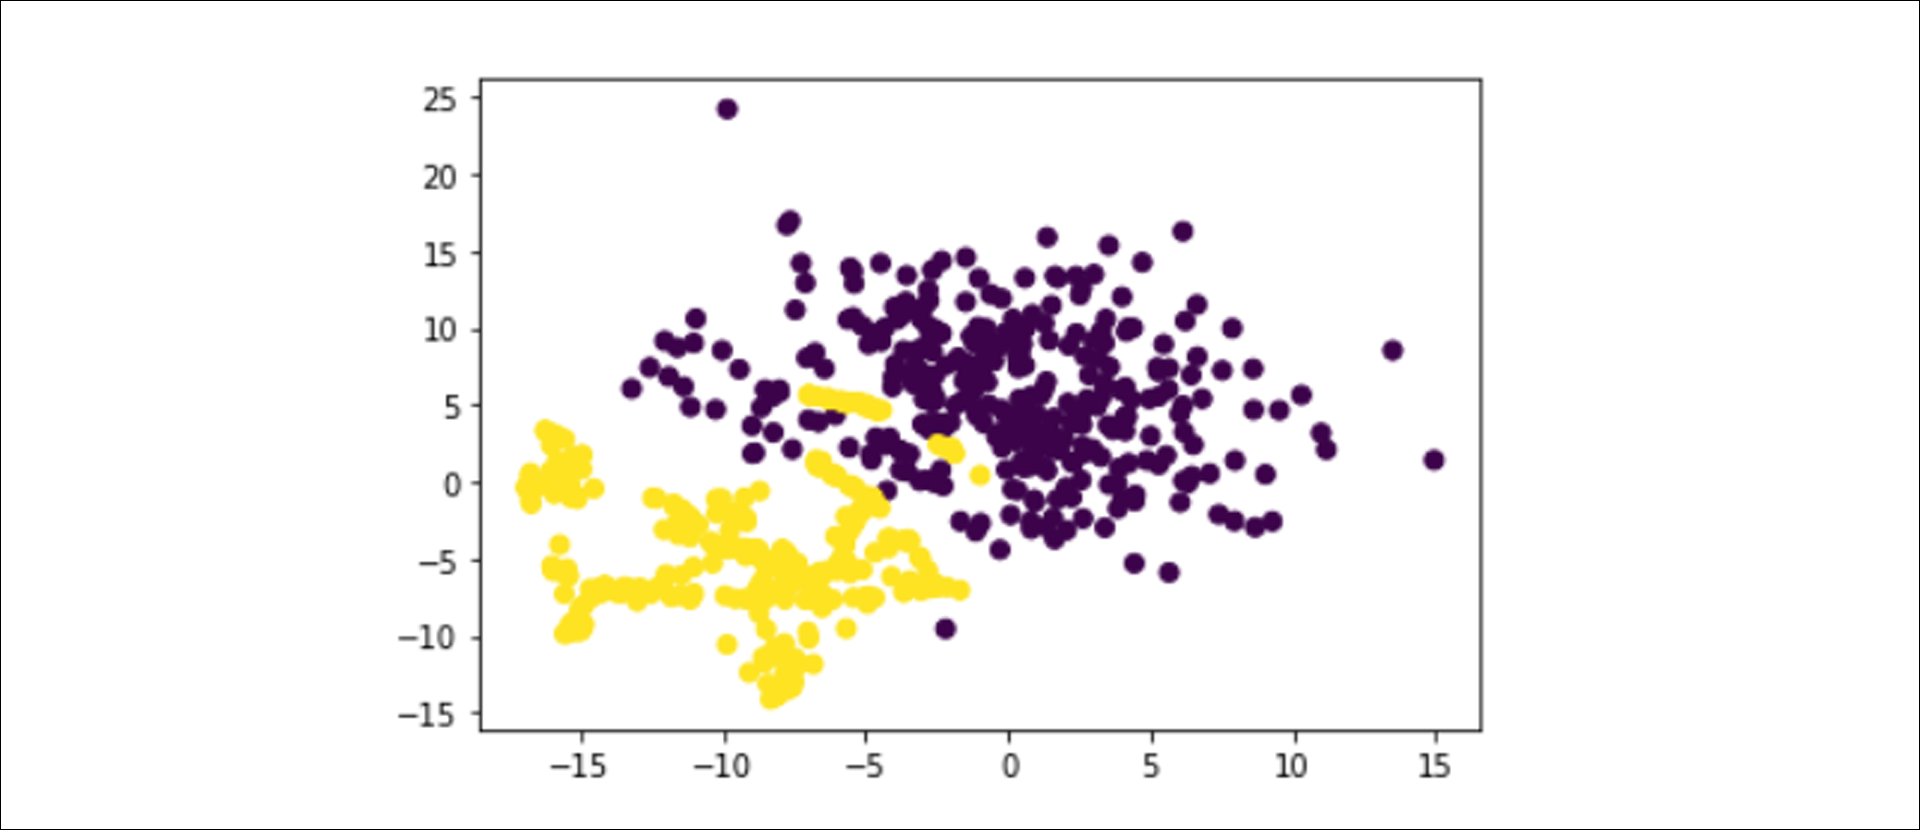

# Combination Sampling

Implement the SMOTEENN technique with the credit card default data. Then estimate a logistic regression model and report the classification evaluation metrics.

ln_balance_limit is the log of the maximum balance they can have on the card; 1 is female, 0 male for sex; the education is denoted: 1 = graduate school; 2 = university; 3 = high school; 4 = others; 1 is married and 0 single for marriage; default_next_month is whether the person defaults in the following month (1 yes, 0 no).

In [1]:
import pandas as pd
from path import Path
from collections import Counter

In [2]:
data = Path('../Resources/cc_default.csv')
df = pd.read_csv(data)
df.head()

,ID,ln_balance_limit,sex,education,marriage,age,default_next_month
0,1,9.903488,1,2,0,24,1
1,2,11.695247,1,2,1,26,1
2,3,11.407565,1,2,1,34,0
3,4,10.819778,1,2,0,37,0
4,5,10.819778,0,2,0,57,0


In [3]:
# List comprehension for the ID and default_next_month columns are filtered to create the features dataset. 
# The default_next_month column is defined as the target dataset.
x_cols = [i for i in df.columns if i not in ('ID', 'default_next_month')]
X = df[x_cols]
y = df['default_next_month']

In [4]:
x_cols

['ln_balance_limit', 'sex', 'education', 'marriage', 'age']

In [5]:
Counter(y)

Counter({1: 6636, 0: 23364})

In [6]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Combination Sampling with SMOTEENN

In [7]:
# Use the SMOTEENN technique to perform combination sampling on the data
# Count the resampled classes
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 10151, 1: 7674})

# Logistic Regression

In [8]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluation Metrics

In [9]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4172, 1660],
       [ 882,  786]], dtype=int64)

In [10]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.5932932666212709

In [11]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.83      0.72      0.47      0.77      0.58      0.35      5832
          1       0.32      0.47      0.72      0.38      0.58      0.33      1668

avg / total       0.71      0.66      0.53      0.68      0.58      0.34      7500



### Resampling with SMOTEENN did not work miracles, but some of the metrics show an improvement over undersampling.